# Import các thư viện cần thiết

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("Data/BA_Reviews_processed.csv")

## Biểu đồ x

+ **Tiêu đề:** Phân tích biến động điểm đánh giá chuyến bay theo năm.
+ **Loại biểu đồ:** Line chart.
+ **Lý do chọn:**
    + **Đánh giá xu hướng và biến động:** Biểu đồ đường là công cụ mạnh mẽ để phản ánh sự thay đổi của điểm đánh giá chuyến bay qua các năm. Dữ liệu điểm đánh giá chuyến bay thường có tính chất liên tục và thay đổi theo thời gian. Biểu đồ đường giúp chúng ta nhìn nhận rõ ràng xu hướng tăng giảm của điểm đánh giá theo từng năm, giúp dễ dàng nhận biết sự phát triển hoặc giảm sút của chất lượng dịch vụ.
    + **Dễ hiểu và trực quan:** Biểu đồ đường giúp người đọc nhanh chóng nhận biết xu hướng tăng giảm của chất lượng dịch vụ theo thời gian. Sự biến đổi của điểm đánh giá được minh họa một cách trực quan thông qua các đường cong, giúp người đọc nhanh chóng hiểu được diễn biến chung của chất lượng dịch vụ qua các năm.

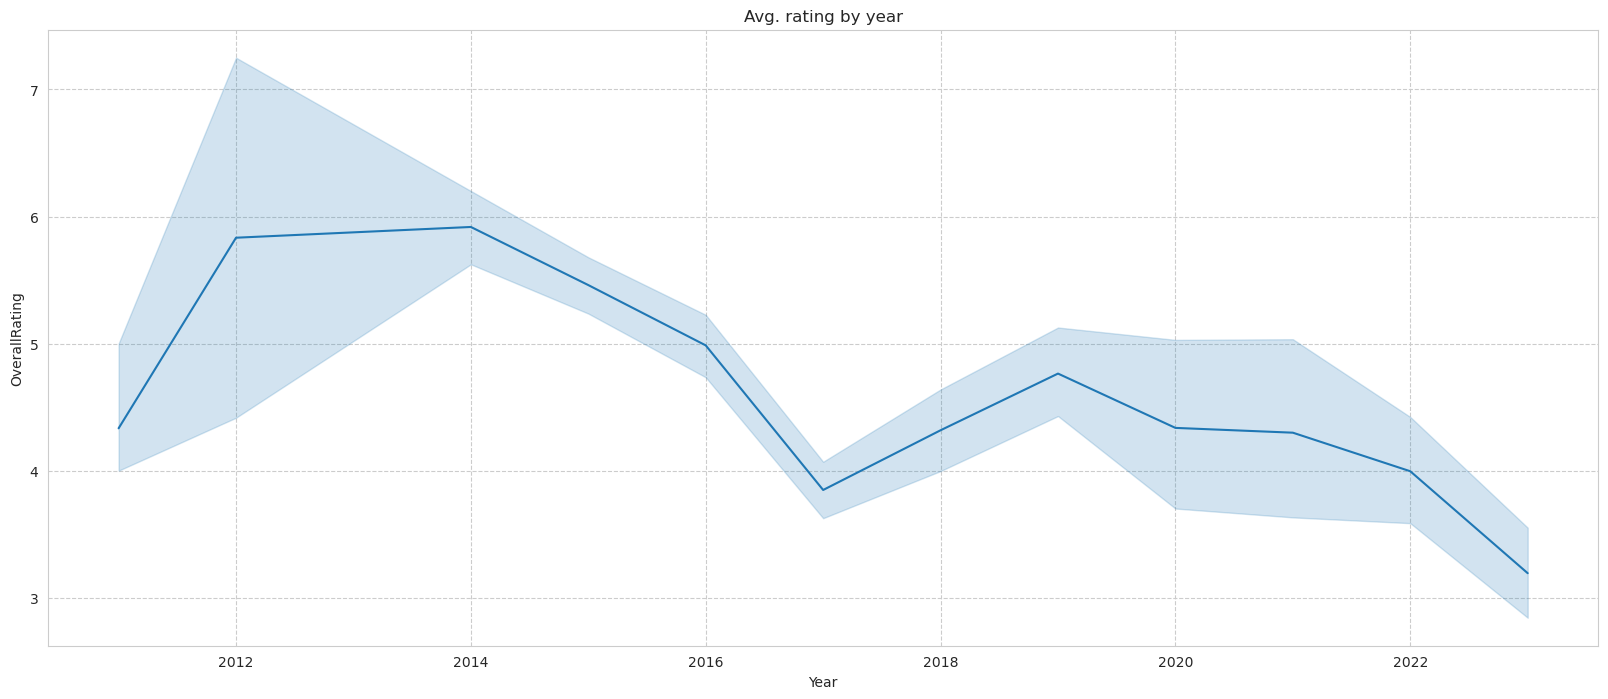

In [37]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year']=(df['Datetime']).dt.year
plt.subplots(figsize=(20,8))
sns.lineplot(x='Year', y='OverallRating', data=df).set_title('Avg. rating by year')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show();

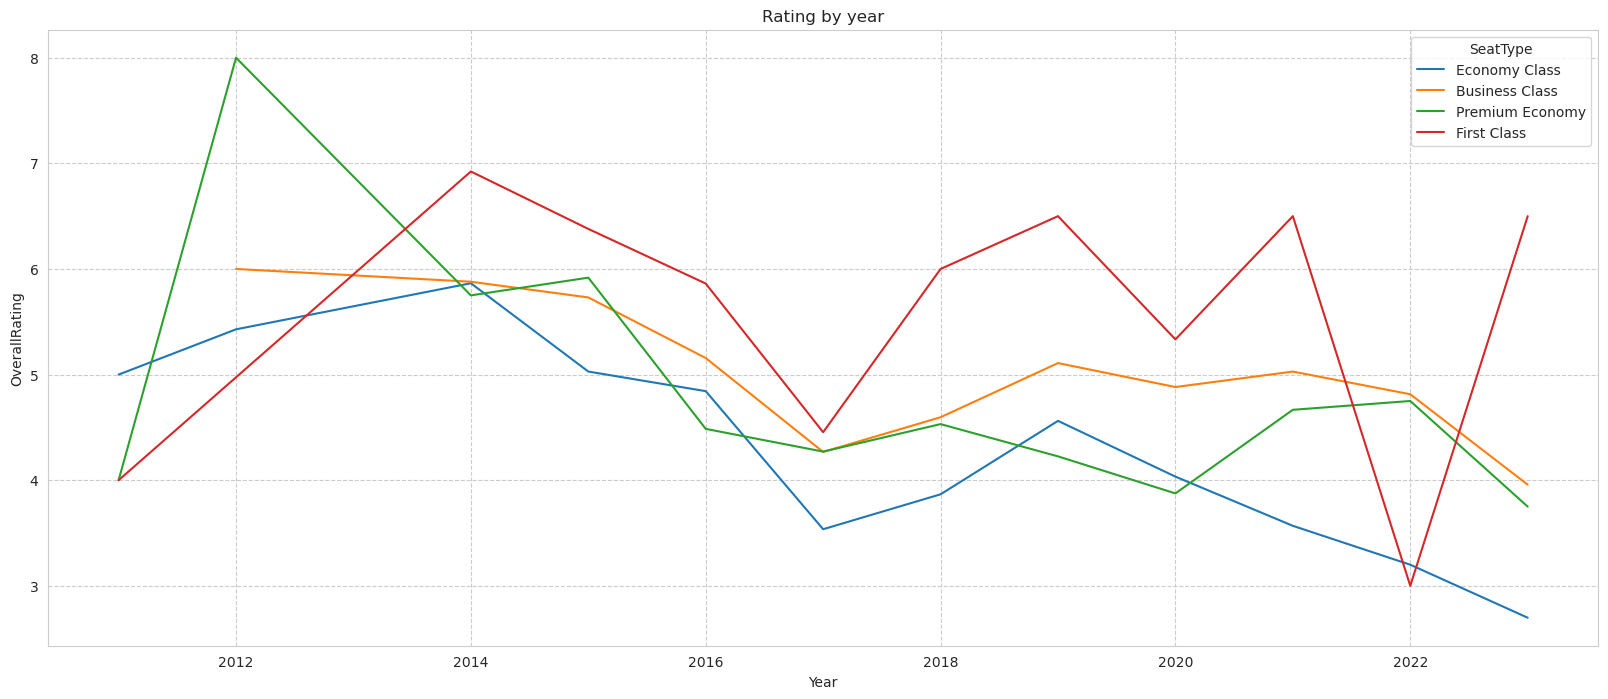

In [33]:
plt.subplots(figsize=(20,8))
sns.lineplot(x='Year', y='OverallRating', data=df, hue='SeatType', errorbar=None).set_title('Rating by year')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show();

**Nhận xét:**

+ Tổng quan, điểm đánh giá của các hạng ghế dường như đã nhẹ nhàng giảm trong khoảng thời gian từ năm 2012 đến năm 2022.
+ Hạng phổ thông thường có điểm đánh giá thấp hơn so với các hạng ghế khác. Điều này có thể là do hành khách bay ở hạng phổ thông thường gặp phải ít tiện nghi hơn và không có nhiều không gian cho chân hơn so với hành khách ở các hạng cabin khác.
+ Hạng thương gia dường như đã ổn định vào năm 2020 và 2022 sau một giai đoạn tăng nhẹ từ năm 2017.
+ Cả hạng phổ thông cao cấp và hạng nhất có vẻ có xu hướng biến động nhiều nhất, tuy nhiên, cả hai hạng ghế này luôn đạt được điểm đánh giá trung bình cao nhất trong các loại hạng ghế. Nguyên nhân có thể là những tiện ích mà cả hai hạng ghế này mang lại cho khách hàng.

## Biểu đồ x

+ **Tiêu đề:** Thuộc tính nào ảnh hưởng đến Overall Rating nhiều nhất trong mô hình Random Forests.
+ **Loại biểu đồ:** Bar chart.
+ **Lý do chọn:** 
    - **Đơn giản và minh bạch:** Biểu đồ cột là công cụ trực quan, giúp người đọc dễ dàng nhận biết yếu tố nào ảnh hưởng nhiều nhất đến Overall Rating. Sự khác biệt giữa các cột dễ dàng thu hút sự chú ý và hiểu được mức độ ảnh hưởng của từng yếu tố. Bằng cách so sánh chiều cao của các cột, người đọc có thể dễ dàng nhận ra yếu tố quan trọng nhất.
    - **Phù hợp với dữ liệu không liên tục:** Dữ liệu về mức độ ảnh hưởng của các yếu tố thường là rời rạc và không liên tục, biểu đồ cột là lựa chọn phù hợp nhất để biểu diễn thông tin này. Mỗi cột trên biểu đồ đại diện cho một yếu tố cụ thể, không cần các giá trị liên tục giữa chúng.
    - **Thích hợp cho các nhóm dữ liệu:** Trong trường hợp này, chúng ta có một số yếu tố cụ thể và biểu đồ cột là công cụ phù hợp để thể hiện mỗi yếu tố một cách rõ ràng và so sánh chúng với nhau.

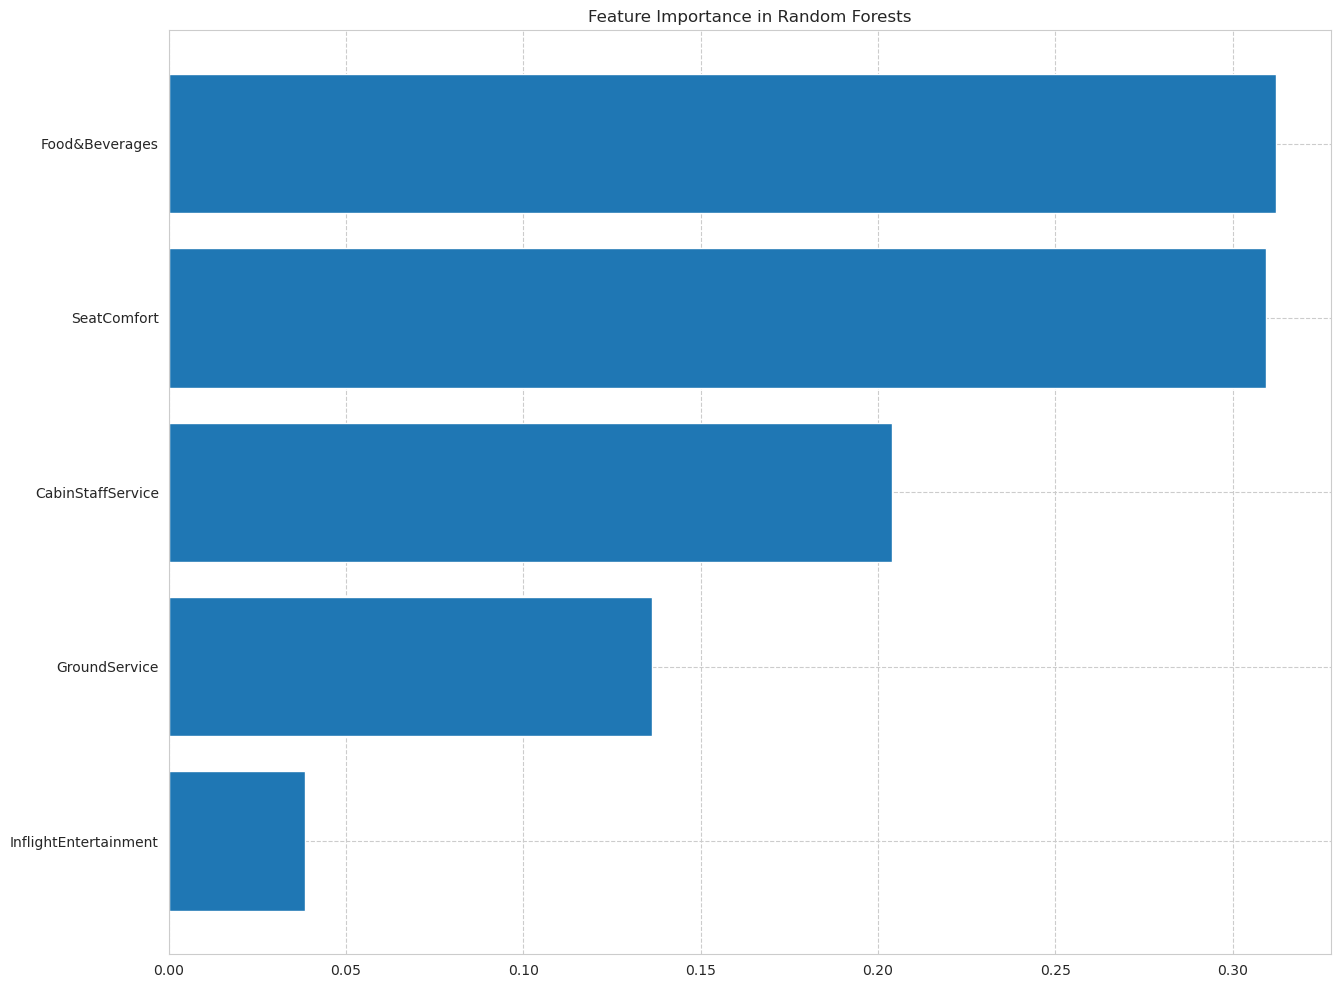

In [34]:
from sklearn.ensemble import RandomForestRegressor

X = df[['SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'InflightEntertainment']]
y = df[['OverallRating']]

model = RandomForestRegressor()
model.fit(X, y)

f, ax=plt.subplots(figsize=(15,12))
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax)
ax.set_title('Feature Importance in Random Forests');

**Nhận xét:**

+ `Food&Beverages` và `SeatComfort` được xác định là hai yếu tố quan trọng nhất trong việc đánh giá trải nghiệm của hành khách trên chuyến bay. Sự ảnh hưởng của chúng đối với kết quả của mô hình là rất lớn, cho thấy mức độ quan trọng của việc cải thiện các dịch vụ ẩm thực và tiện nghi của hành khách.
+ Trong khi đó, `InflightEntertainment`, mặc dù có sẵn trên một số chuyến bay, nhưng không ảnh hưởng đến mô hình một cách đáng kể. Việc loại bỏ nó khỏi mô hình không chỉ giúp tối ưu hóa hiệu suất mô hình mà còn giảm bớt phức tạp trong việc xử lý dữ liệu, từ đó tăng cường khả năng dự đoán chính xác của mô hình.

## Biểu đồ x

- **Tiêu đề:** Phản ánh ý kiến qua Đám mây từ
- **Loại biểu đồ:** Đám mây từ (WordCloud)
- **Lý do lựa chọn:**
    - **Trực quan và tiện dụng:** Đám mây từ là một công cụ trực quan mạnh mẽ, nhanh chóng thu hút sự chú ý của người xem. Sự kết hợp của kích thước chữ và màu sắc tạo nên một hình ảnh độc đáo và dễ nhìn.
    - **Phù hợp với dữ liệu văn bản:** Với dữ liệu văn bản như đánh giá, đám mây từ là lựa chọn lý tưởng để thể hiện tần suất xuất hiện của các từ và cụm từ khác nhau.
    - **Tập trung vào những từ quan trọng:** Bằng cách làm nổi bật các từ quan trọng thông qua kích thước và màu sắc, đám mây từ giúp người xem nhanh chóng nhận ra những chủ đề chính và ý kiến phổ biến nhất trong đánh giá.
    - **Tạo ấn tượng mạnh mẽ:** Thay vì chỉ liệt kê các tiêu đề đánh giá, đám mây từ tạo ra một hình ảnh mạnh mẽ và độc đáo, gợi lên sự tò mò và khám phá của người xem.

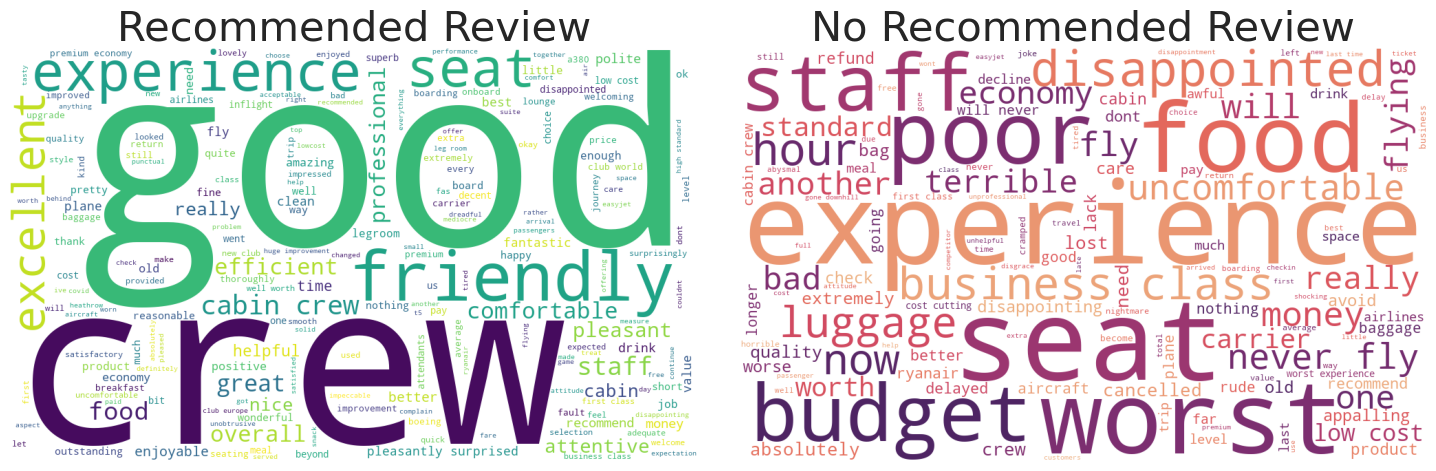

In [35]:
from wordcloud import WordCloud

def create_cloud(text):
    stopwords = ['British', 'british', 'Airways', 'airways', 'airline', 'customer', 'review',
                 'flights', 'flight', 'Service', 'service', 'BA', 'ba']
    comment_words = ' '
    
    for val in text:
        val = str(val)
        tokens = val.split(" ")
        
        for i in range(len(tokens)):
            tokens[i] = ''.join(filter(str.isalnum, tokens[i])).lower()
        
        for words in tokens:
            if words not in stopwords:
                comment_words = comment_words + words + ' '

    return comment_words
        
recommend = df[df['Recommended']=='yes']['ReviewHeader'].values
no_recommend = df[df['Recommended']=='no']['ReviewHeader'].values

wordcloud_recommend = WordCloud(background_color="white", max_words=300, min_font_size = 10, 
                                width=1000, height=600).generate(create_cloud(recommend))
wordcloud_norecommend = WordCloud(background_color="white", max_words=300, colormap='flare', min_font_size = 10, 
                                  width=1000, height=600).generate(create_cloud(no_recommend))
                                             
figure, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].imshow(wordcloud_recommend)
axes[0].axis('off')
axes[0].set_title('Recommended Review', fontsize=30)
axes[1].imshow(wordcloud_norecommend)
axes[1].axis('off')
axes[1].set_title('No Recommended Review', fontsize=30)
plt.tight_layout(pad=3)
plt.show()

**Nhận xét:**
+ Trong quá trình phân tích đánh giá từ khách hàng, các yếu tố quan trọng như đội ngũ nhân viên, chất lượng dịch vụ và sự thoải mái đã được nêu bật một cách rõ ràng. Các từ khóa như **"crew", "good", "friendly", "comfortable",...** đặc biệt nổi bật, cho thấy sự chú ý và đánh giá tích cực từ phía hành khách.
+ Tuy nhiên, không thể phủ nhận rằng có những đánh giá tiêu cực cũng được đưa ra, như **"uncomfortable seat", "bad staff", "poor budget", "worst food", "disappointed", "business class",...** Những phản hồi này cũng cần được chú ý, bởi chúng có thể là dấu hiệu của những vấn đề tiềm ẩn hoặc cần cải thiện trong trải nghiệm của khách hàng.
+ Từ các từ khóa được nêu bật trong phân tích từ, có thể nhận thấy rằng hãng hàng không cần phải tiếp tục quan sát và điều chỉnh chính sách, dịch vụ của mình một cách chính xác và linh hoạt để nâng cao chất lượng và đáp ứng được mong đợi của khách hàng. Điều này cần sự đầu tư và phản hồi tích cực từ phía công ty để duy trì và tăng cường uy tín và sự hài lòng của khách hàng.